<a href="https://colab.research.google.com/github/jeongin-Lee/INBIG-ML/blob/main/2_1_%ED%9B%88%EB%A0%A8%EC%84%B8%ED%8A%B8%EC%99%80_%ED%85%8C%EC%8A%A4%ED%8A%B8_%EC%84%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2-1 훈련 세트와 테스트 세트  

---


## key word : <지도학습, 비지도학습, 훈련세트, 테스트세트>

1.   지도학습과 비지도 학습의 차이를 배움.

2.   모델을 훈련시키는 훈련세트와 모델을 평가하기 위한 테스트 세트로 데이터를 나누어서 학습.



## 1) 인덱싱을 통한 훈련 세트와 테스트 세트 나누기

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
              

In [ ]:
fish_data = [[l,w] for l,w in zip(fish_length, fish_weight)]
fish_target = [1]*35+[0]*14

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
kn = KNeighborsClassifier()

In [ ]:
print(fish_data[4])

[29.0, 430.0]


In [ ]:
train_input= fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [ ]:
kn = kn.fit(train_input,train_target)

In [ ]:
kn.score(test_input,test_target)

0.0

##2) 넘파이를 통해 랜덤으로 인덱싱하여 샘플링 편향 제거하기

#### 샘플링 편향 : 특정 종류의 샘플이 과도하게 많은 경우  
      


In [ ]:
import numpy as np  # 넘파이는 파이썬의 대표적인 배열 라이브러리 
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
print(input_arr.shape)

(49, 2)


In [ ]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [ ]:
# 배열 인덱싱 : 여러개의 인덱스로 한번에 여러개의 원소를 선택함.
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [ ]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]] 

In [ ]:
print(input_arr[13],train_input[0])

[ 32. 340.] [ 32. 340.]


In [ ]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]


## 3) 훈련세트와 테스트 세트로 k-최근접 이웃 모델 훈련시키기

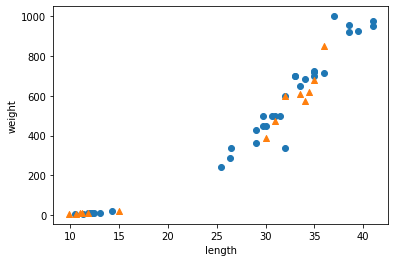

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn = KNeighborsClassifier()
kn = kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [ ]:
print(kn.predict(test_input)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0] [0 0 1 0 1 1 1 0 1 1 0 1 1 0]
